In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import skimage.io
import random
import cv2
#from tqmd import tqmd
DIRECTORY = "img"
FRUITS = ["bananas"]
CATEGORIES = ["good", "bad"]
IMG_SIZE = 70

## Falta cargar/crear una base de datos. sólo copié lo del profe

# Cargar las imágenes

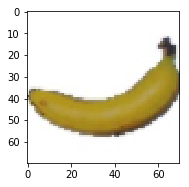

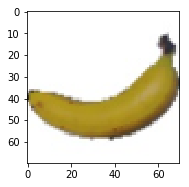

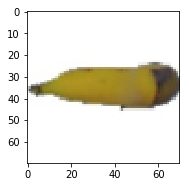

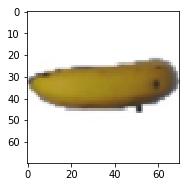

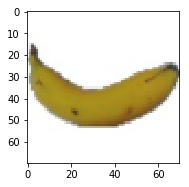

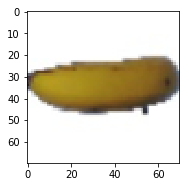

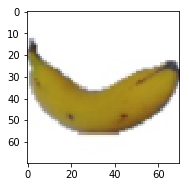

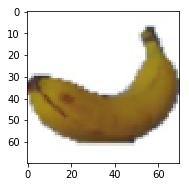

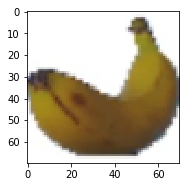

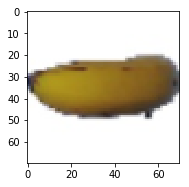

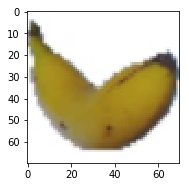

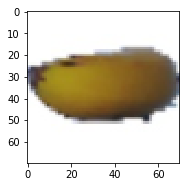

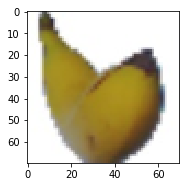

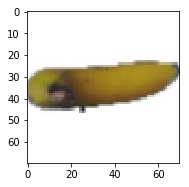

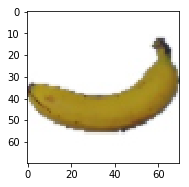

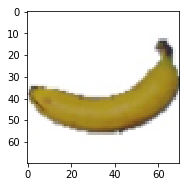

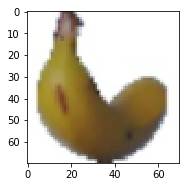

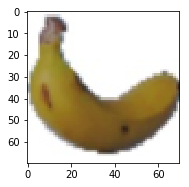

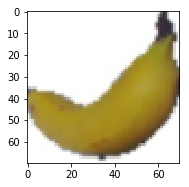

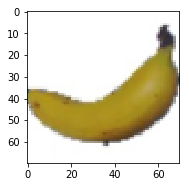

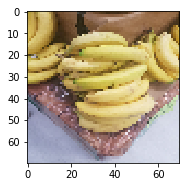

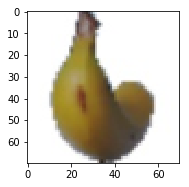

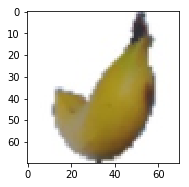

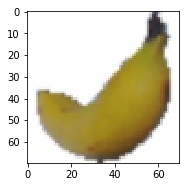

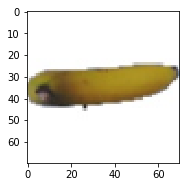

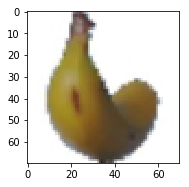

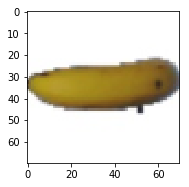

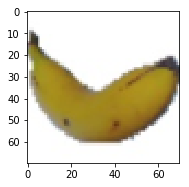

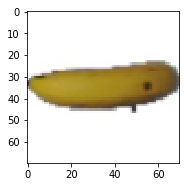

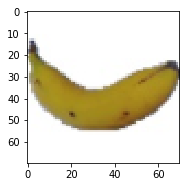

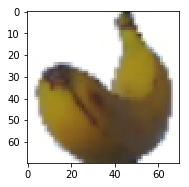

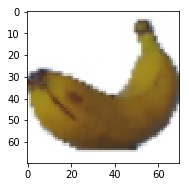

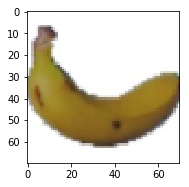

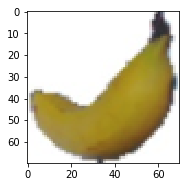

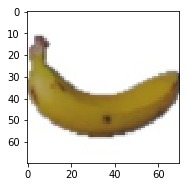

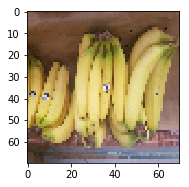

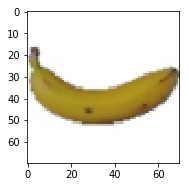

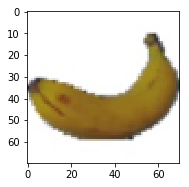

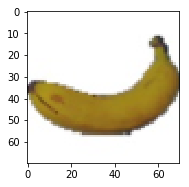

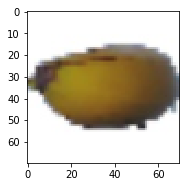

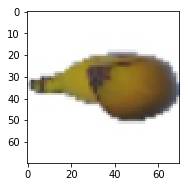

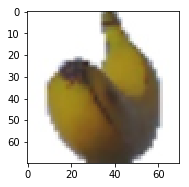

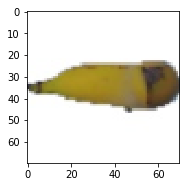

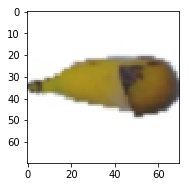

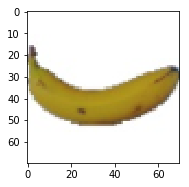

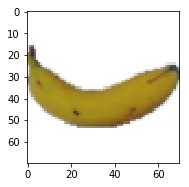

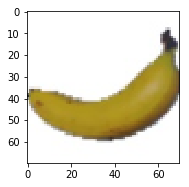

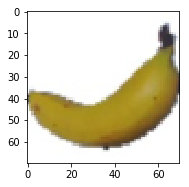

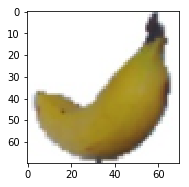

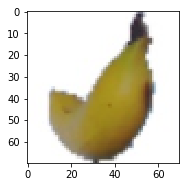

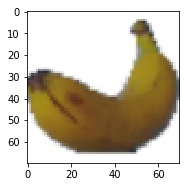

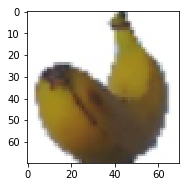

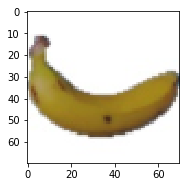

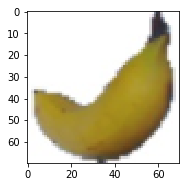

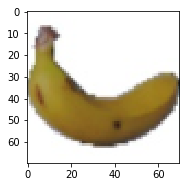

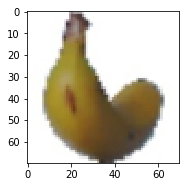

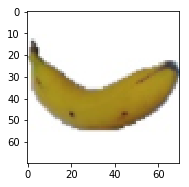

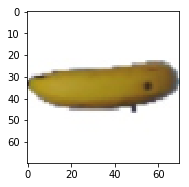

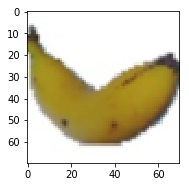

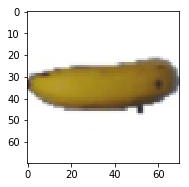

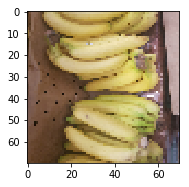

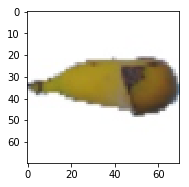

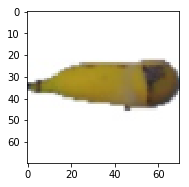

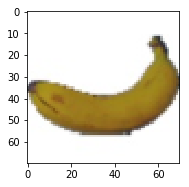

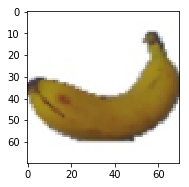

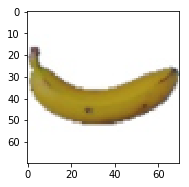

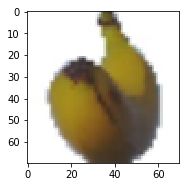

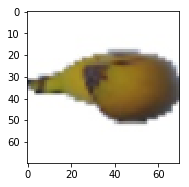

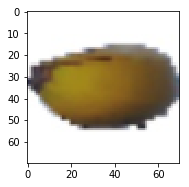

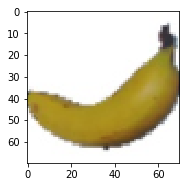

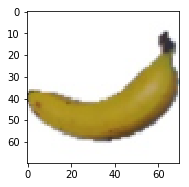

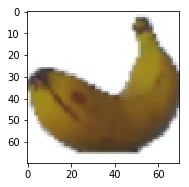

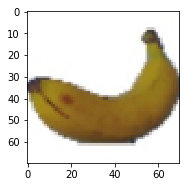

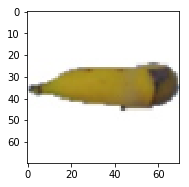

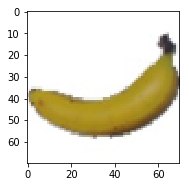

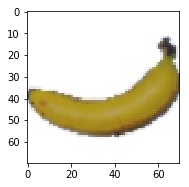

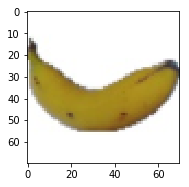

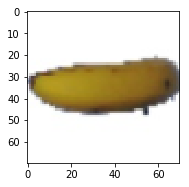

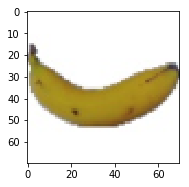

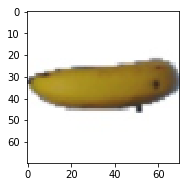

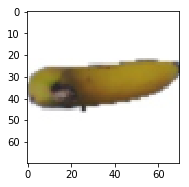

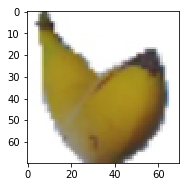

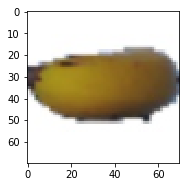

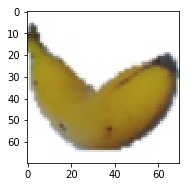

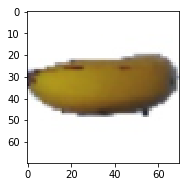

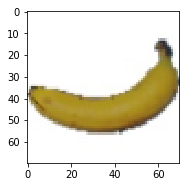

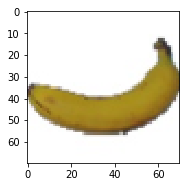

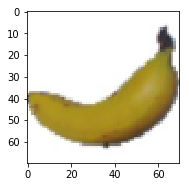

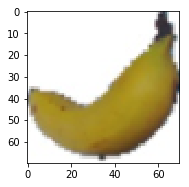

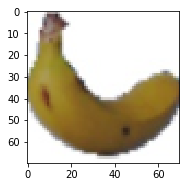

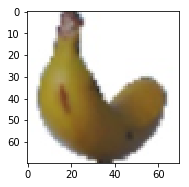

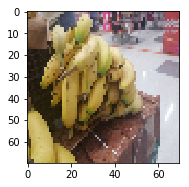

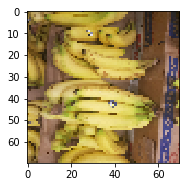

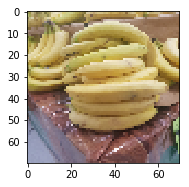

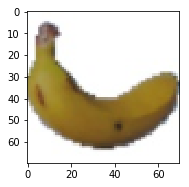

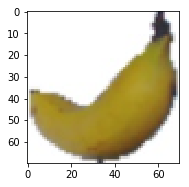

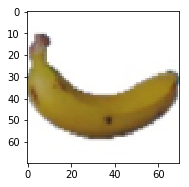

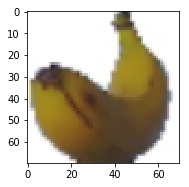

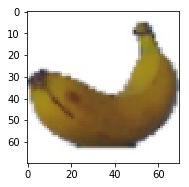

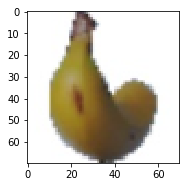

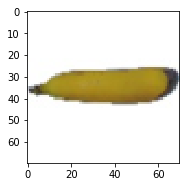

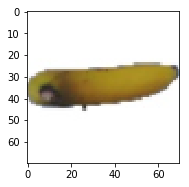

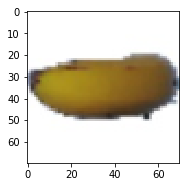

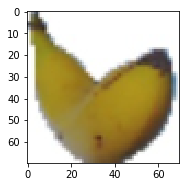

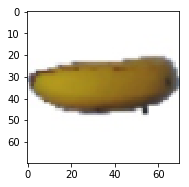

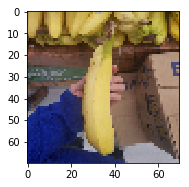

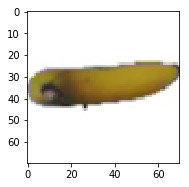

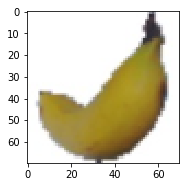

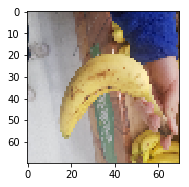

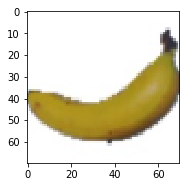

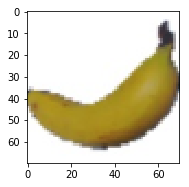

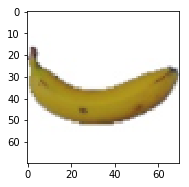

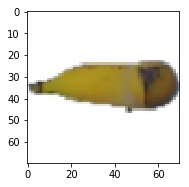

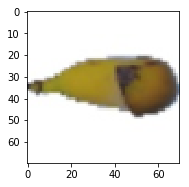

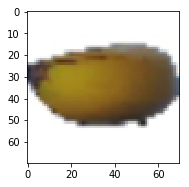

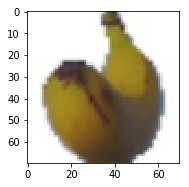

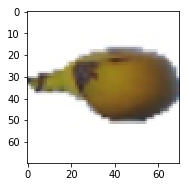

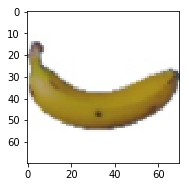

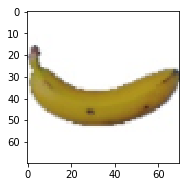

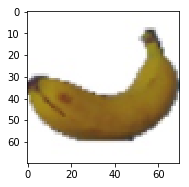

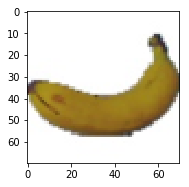

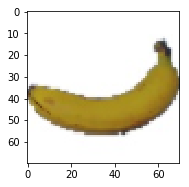

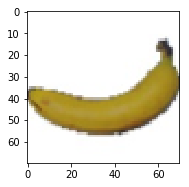

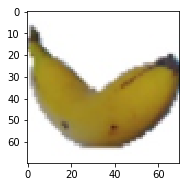

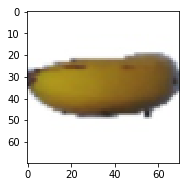

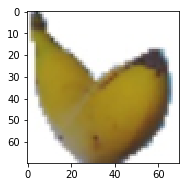

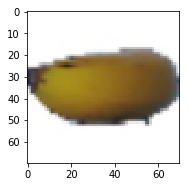

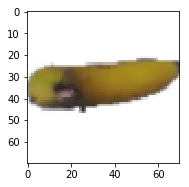

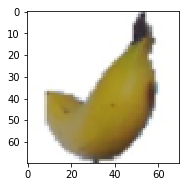

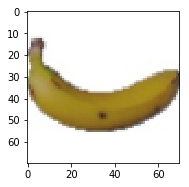

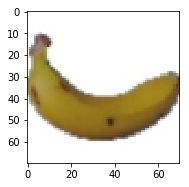

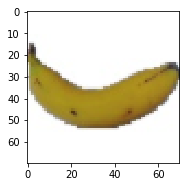

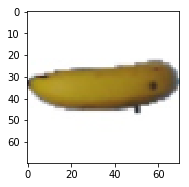

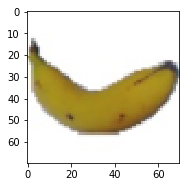

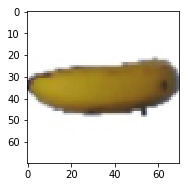

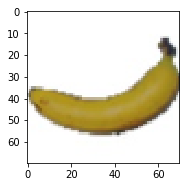

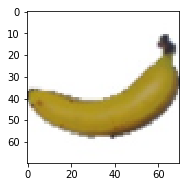

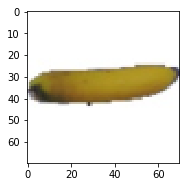

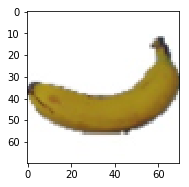

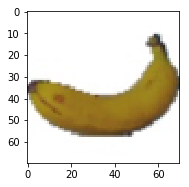

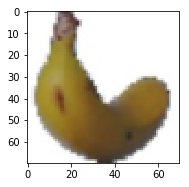

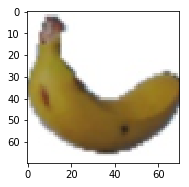

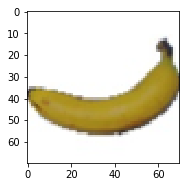

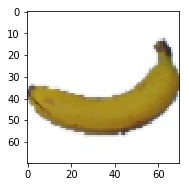

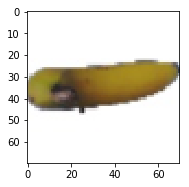

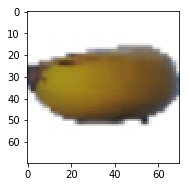

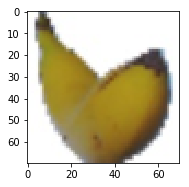

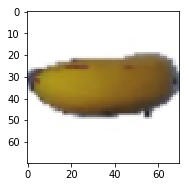

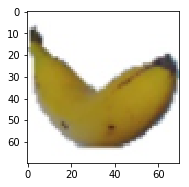

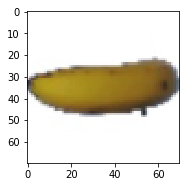

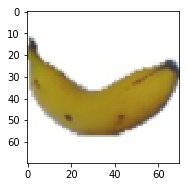

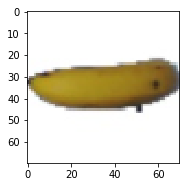

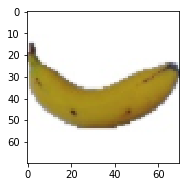

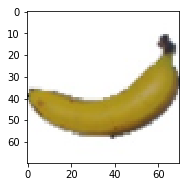

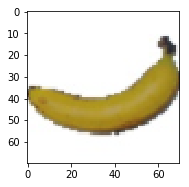

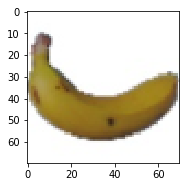

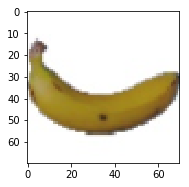

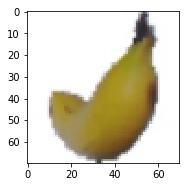

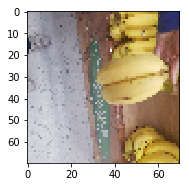

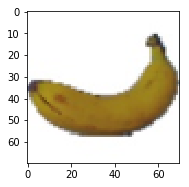

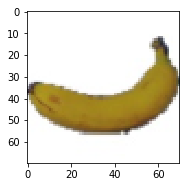

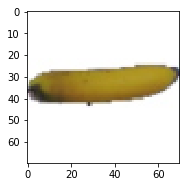

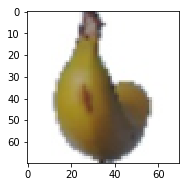

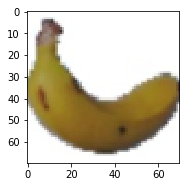

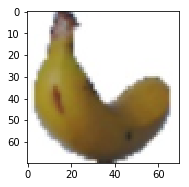

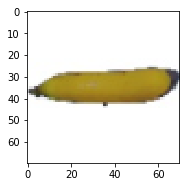

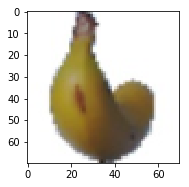

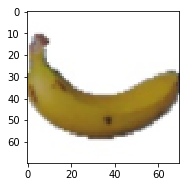

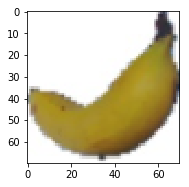

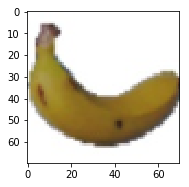

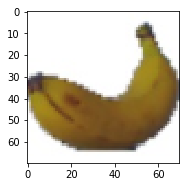

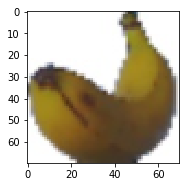

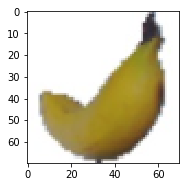

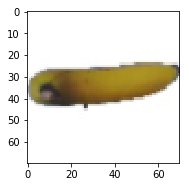

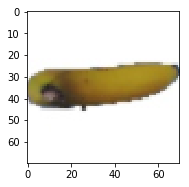

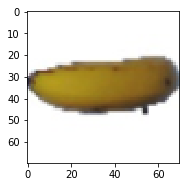

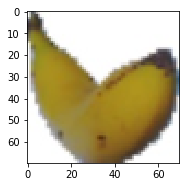

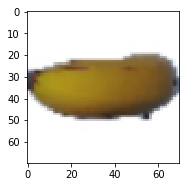

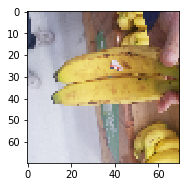

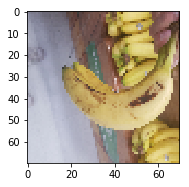

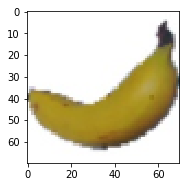

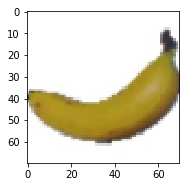

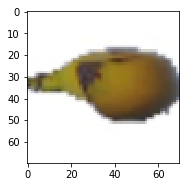

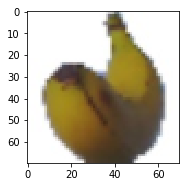

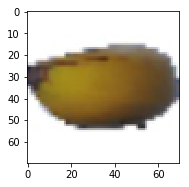

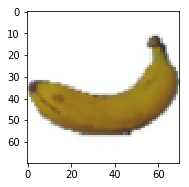

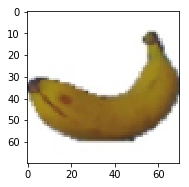

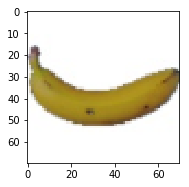

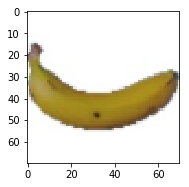

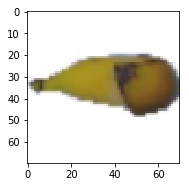

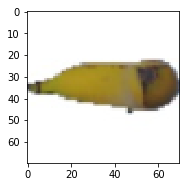

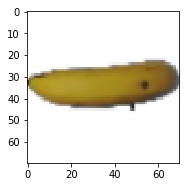

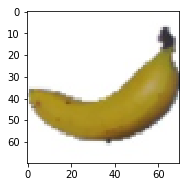

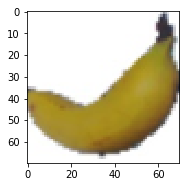

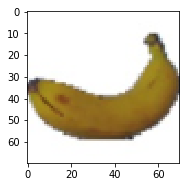

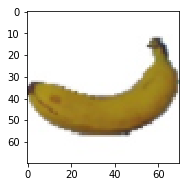

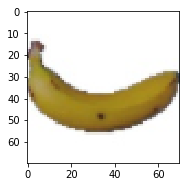

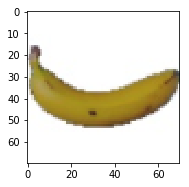

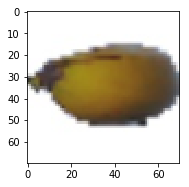

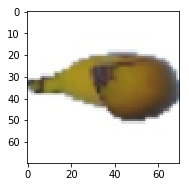

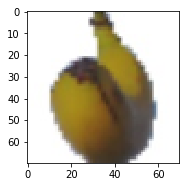

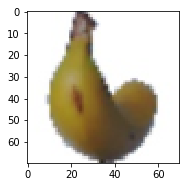

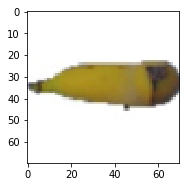

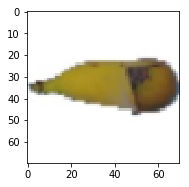

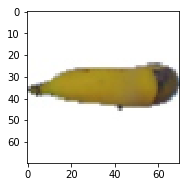

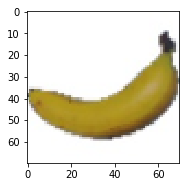

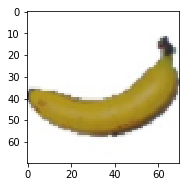

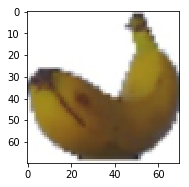

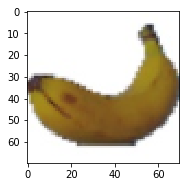

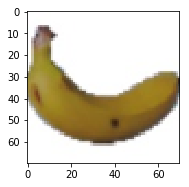

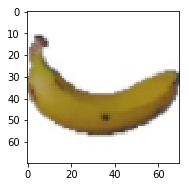

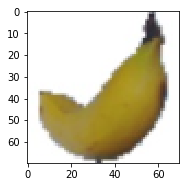

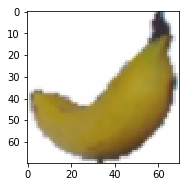

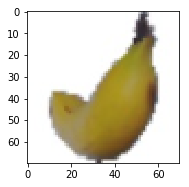

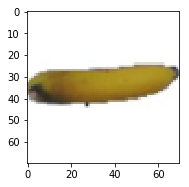

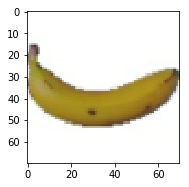

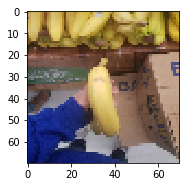

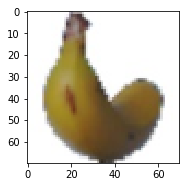

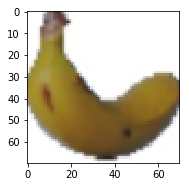

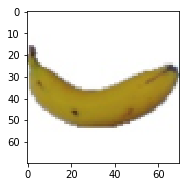

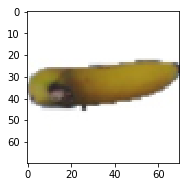

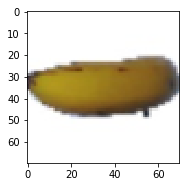

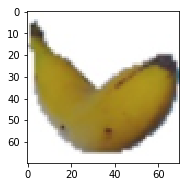

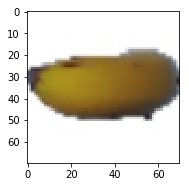

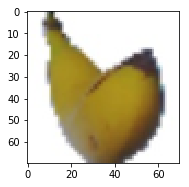

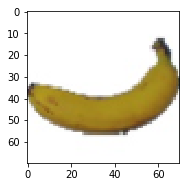

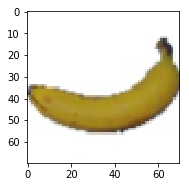

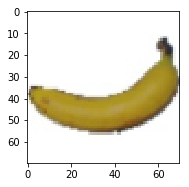

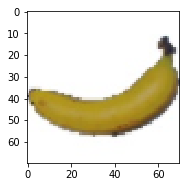

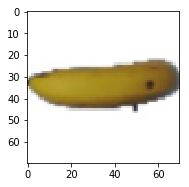

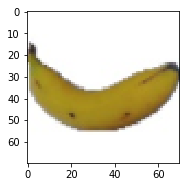

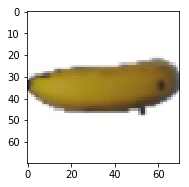

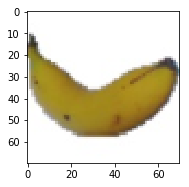

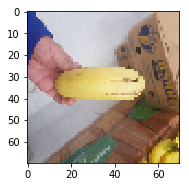

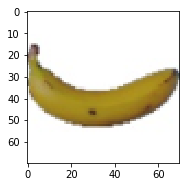

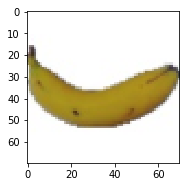

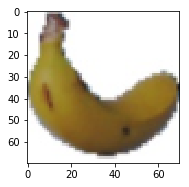

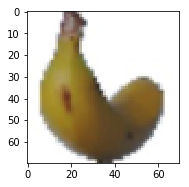

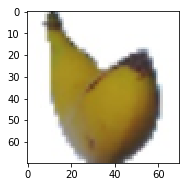

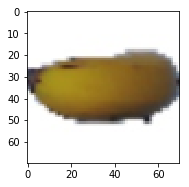

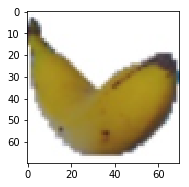

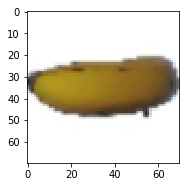

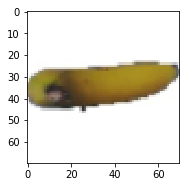

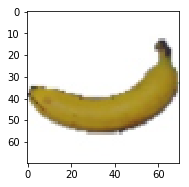

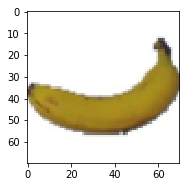

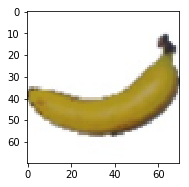

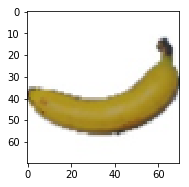

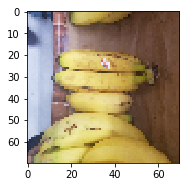

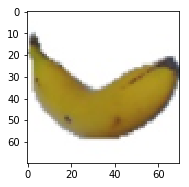

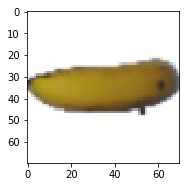

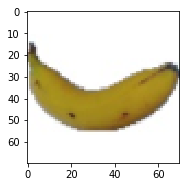

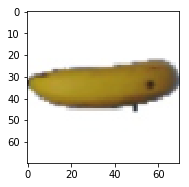

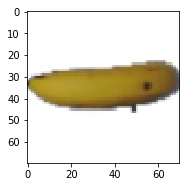

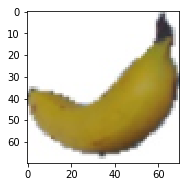

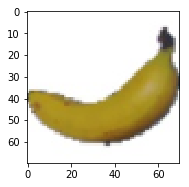

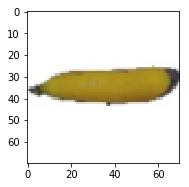

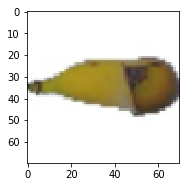

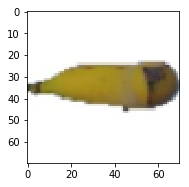

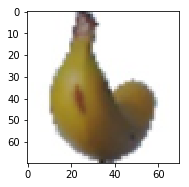

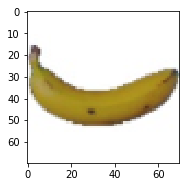

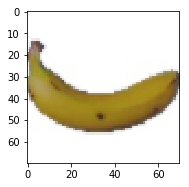

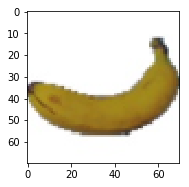

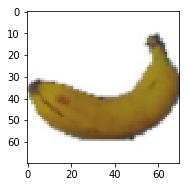

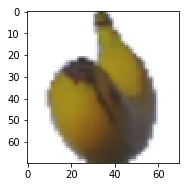

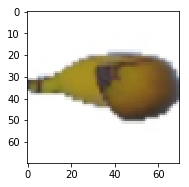

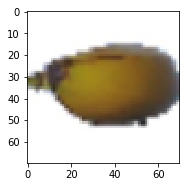

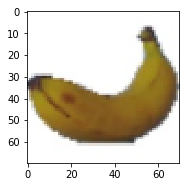

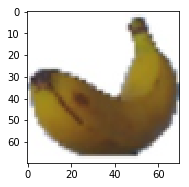

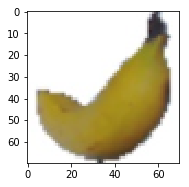

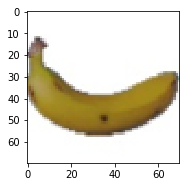

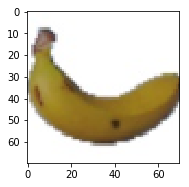

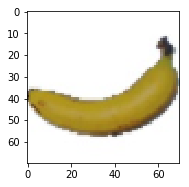

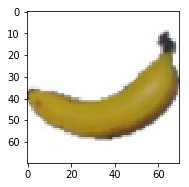

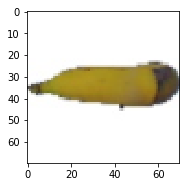

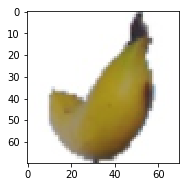

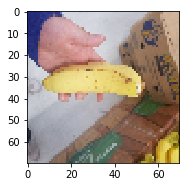

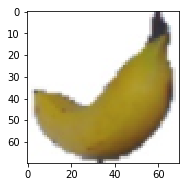

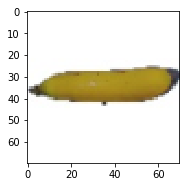

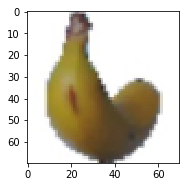

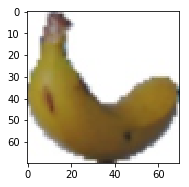

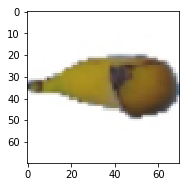

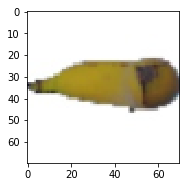

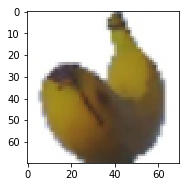

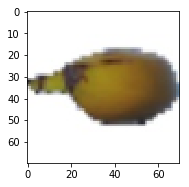

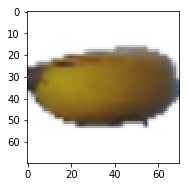

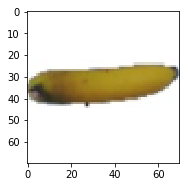

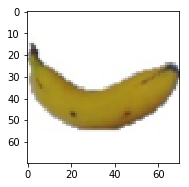

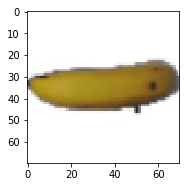

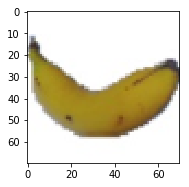

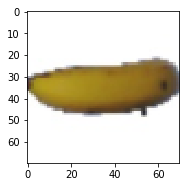

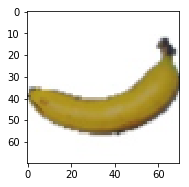

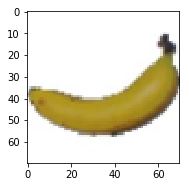

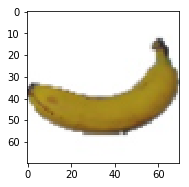

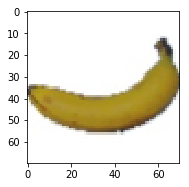

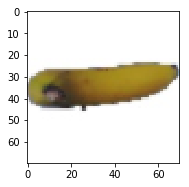

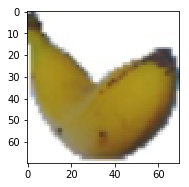

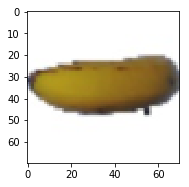

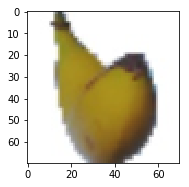

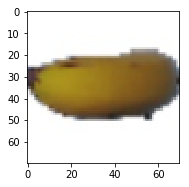

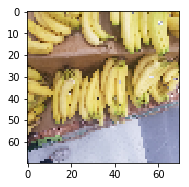

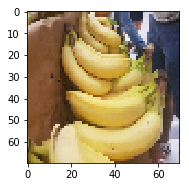

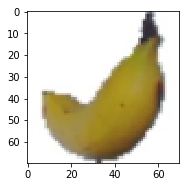

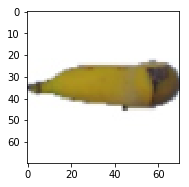

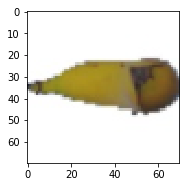

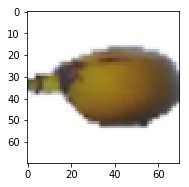

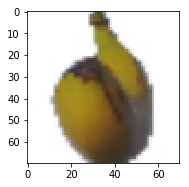

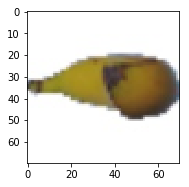

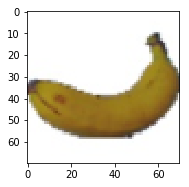

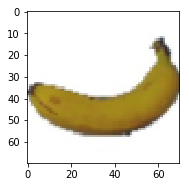

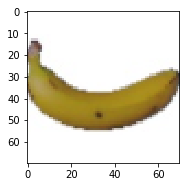

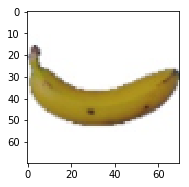

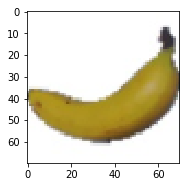

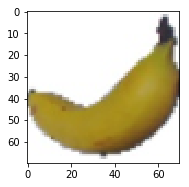

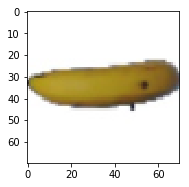

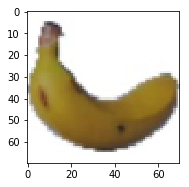

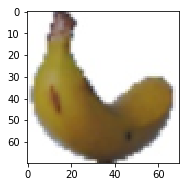

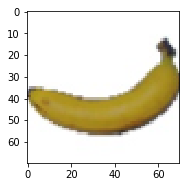

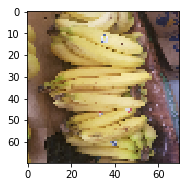

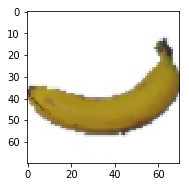

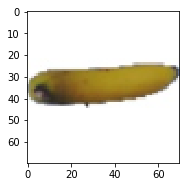

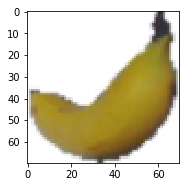

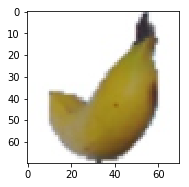

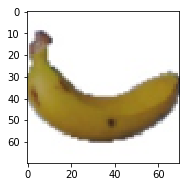

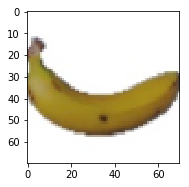

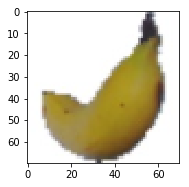

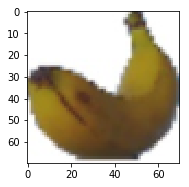

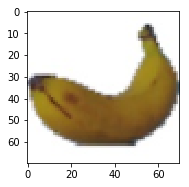

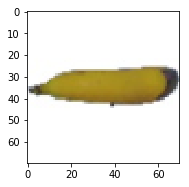

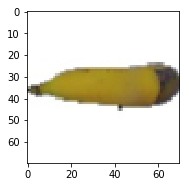

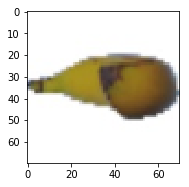

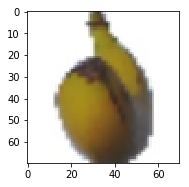

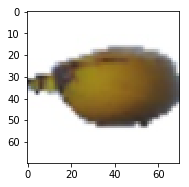

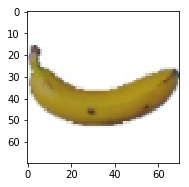

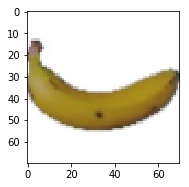

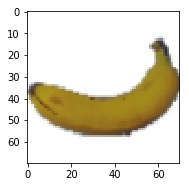

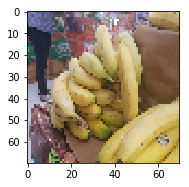

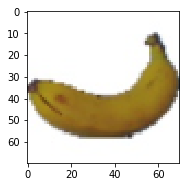

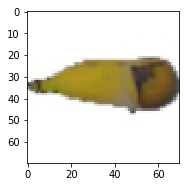

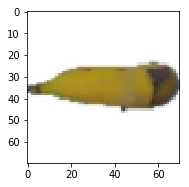

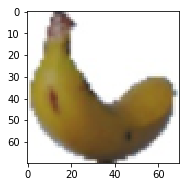

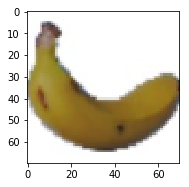

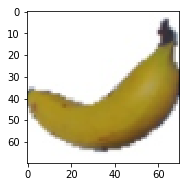

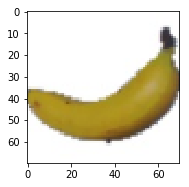

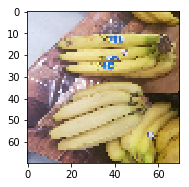

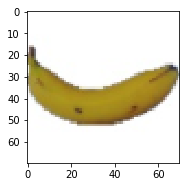

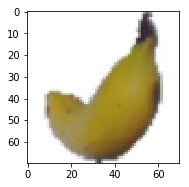

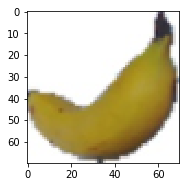

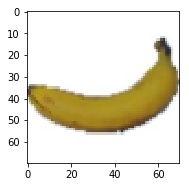

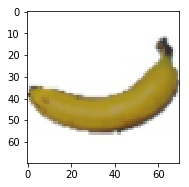

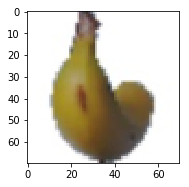

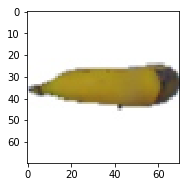

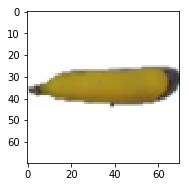

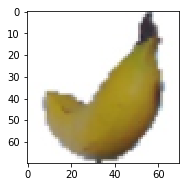

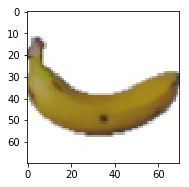

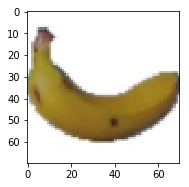

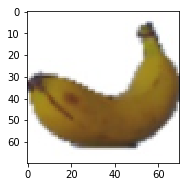

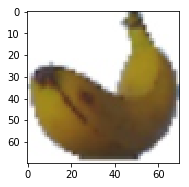

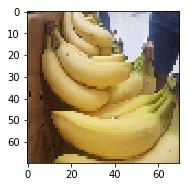

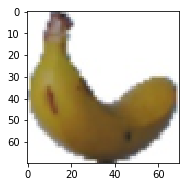

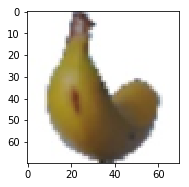

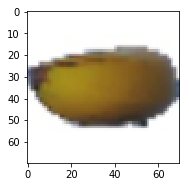

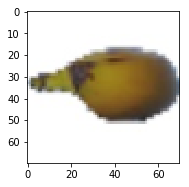

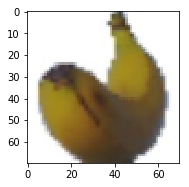

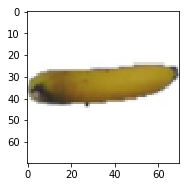

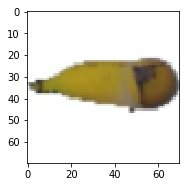

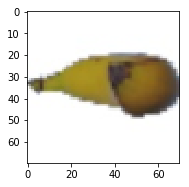

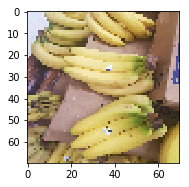

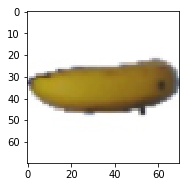

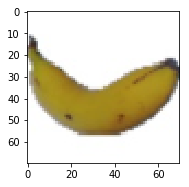

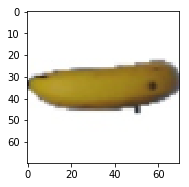

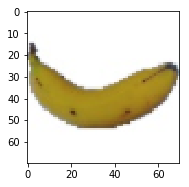

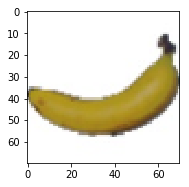

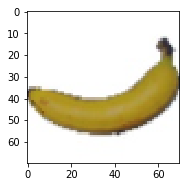

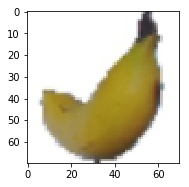

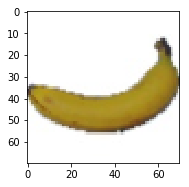

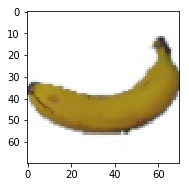

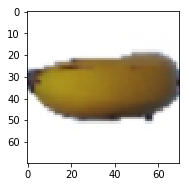

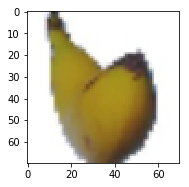

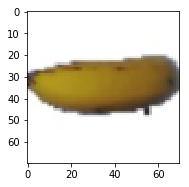

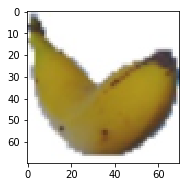

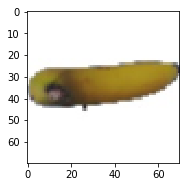

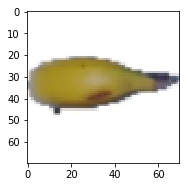

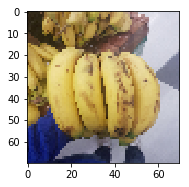

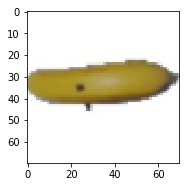

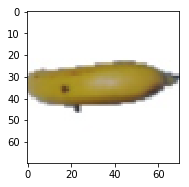

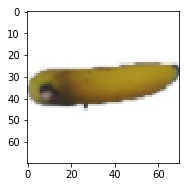

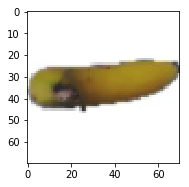

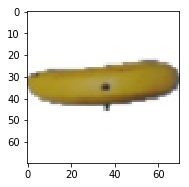

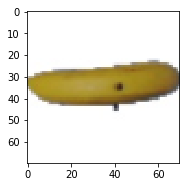

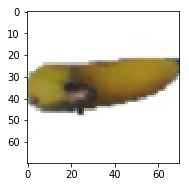

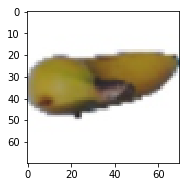

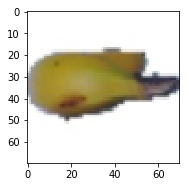

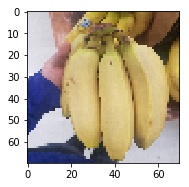

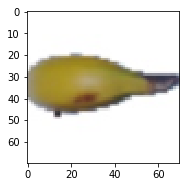

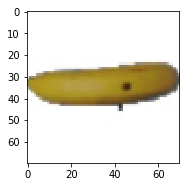

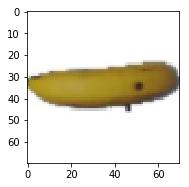

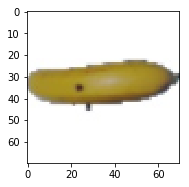

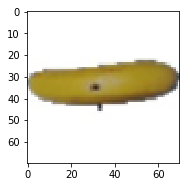

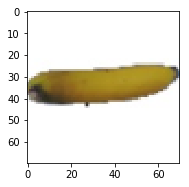

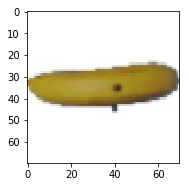

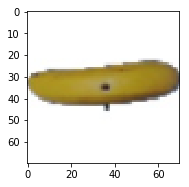

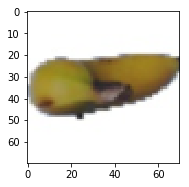

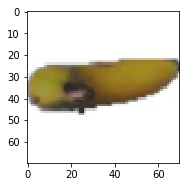

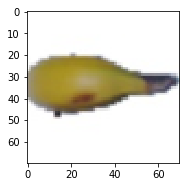

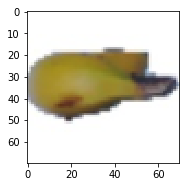

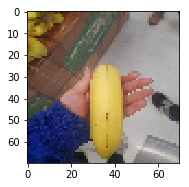

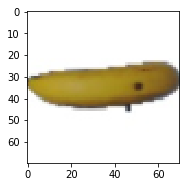

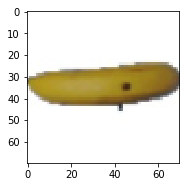

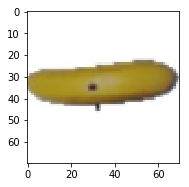

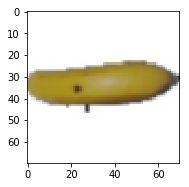

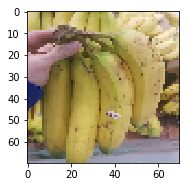

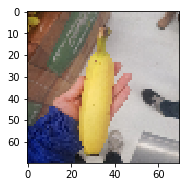

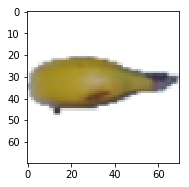

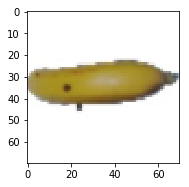

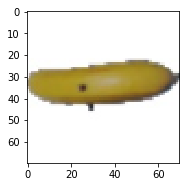

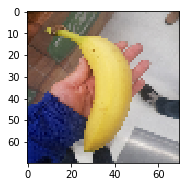

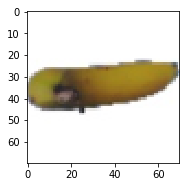

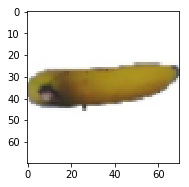

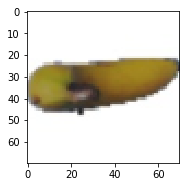

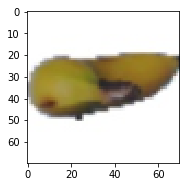

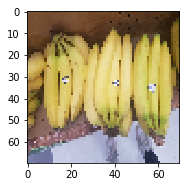

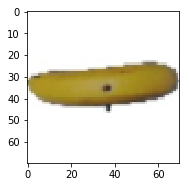

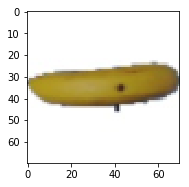

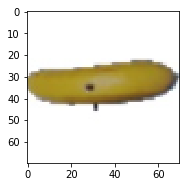

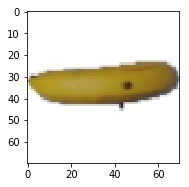

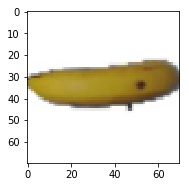

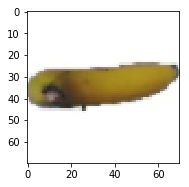

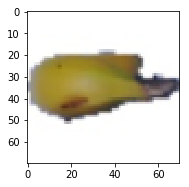

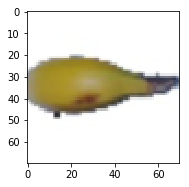

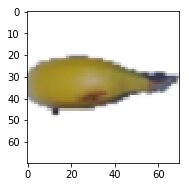

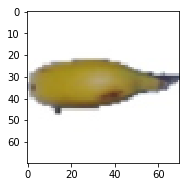

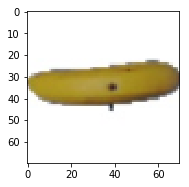

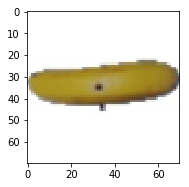

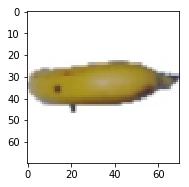

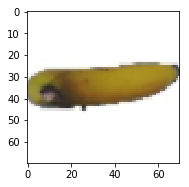

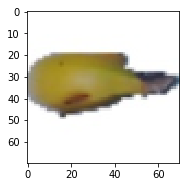

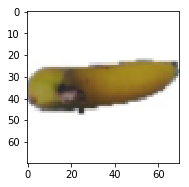

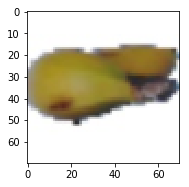

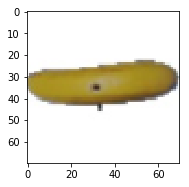

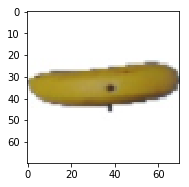

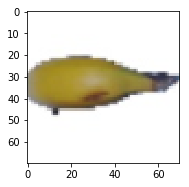

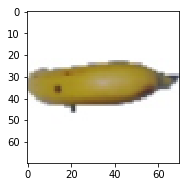

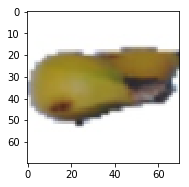

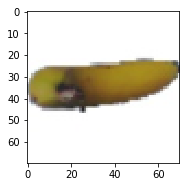

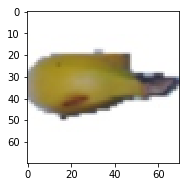

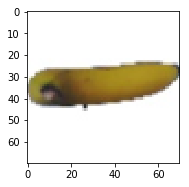

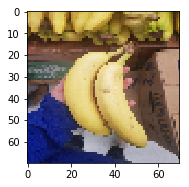

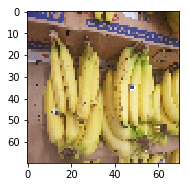

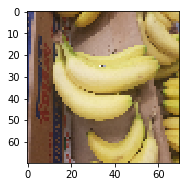

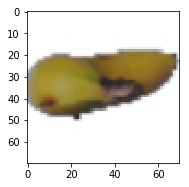

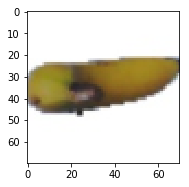

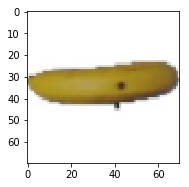

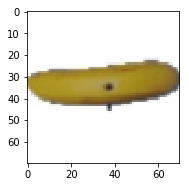

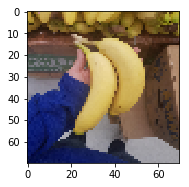

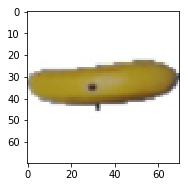

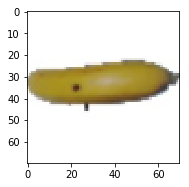

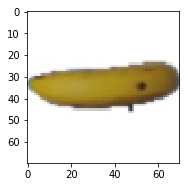

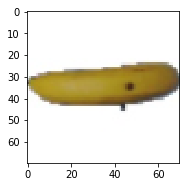

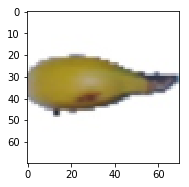

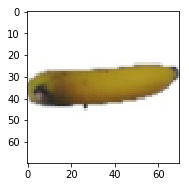

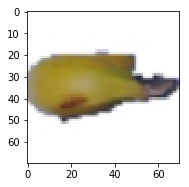

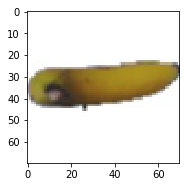

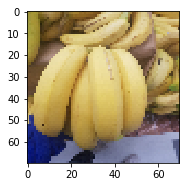

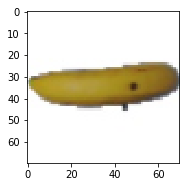

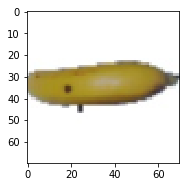

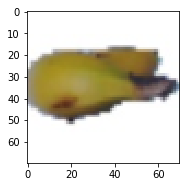

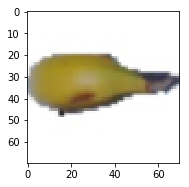

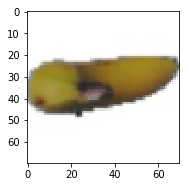

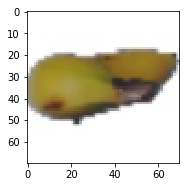

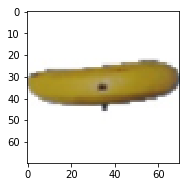

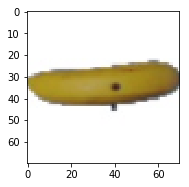

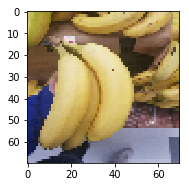

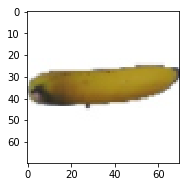

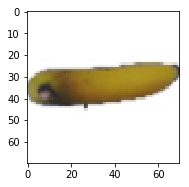

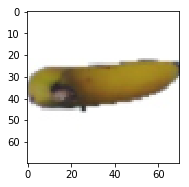

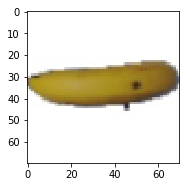

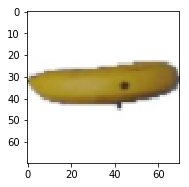

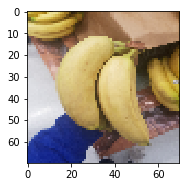

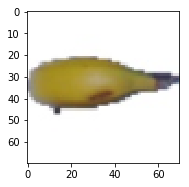

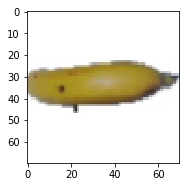

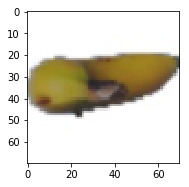

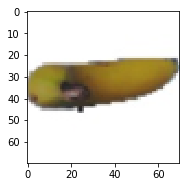

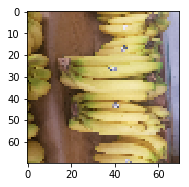

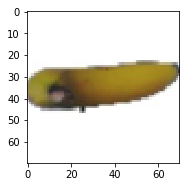

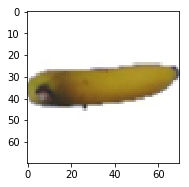

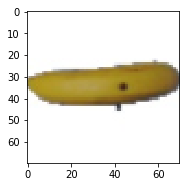

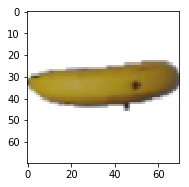

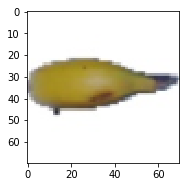

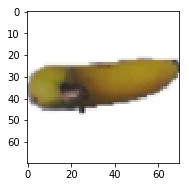

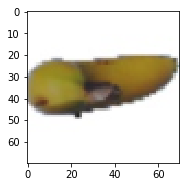

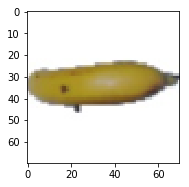

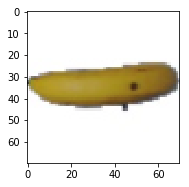

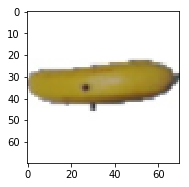

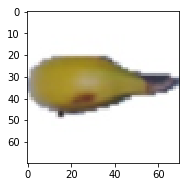

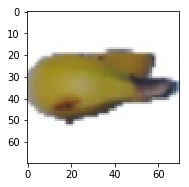

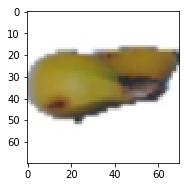

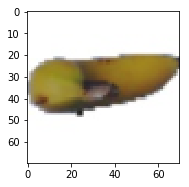

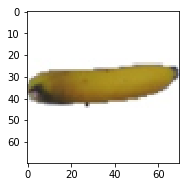

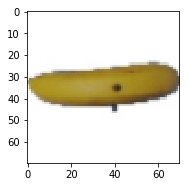

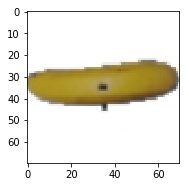

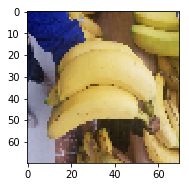

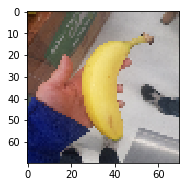

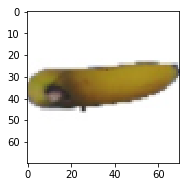

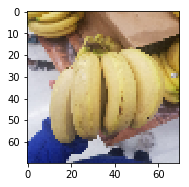

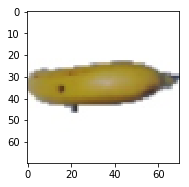

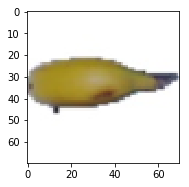

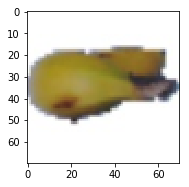

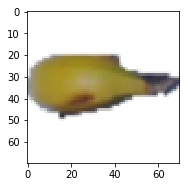

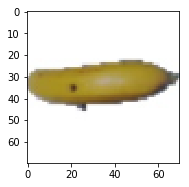

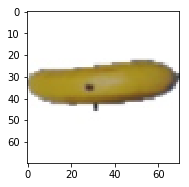

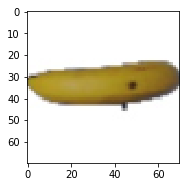

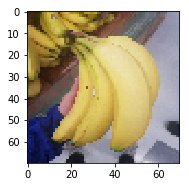

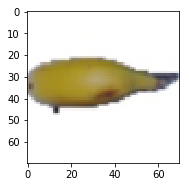

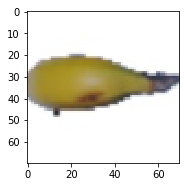

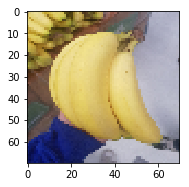

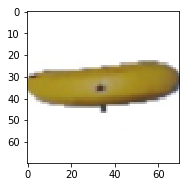

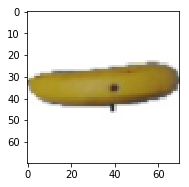

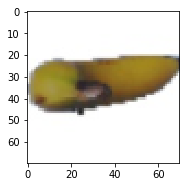

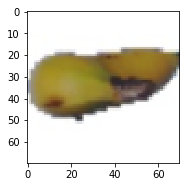

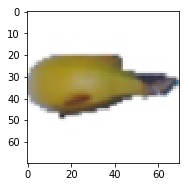

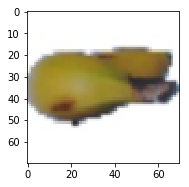

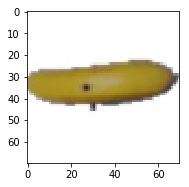

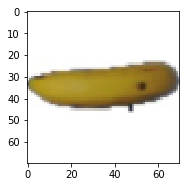

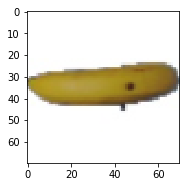

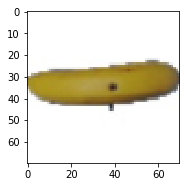

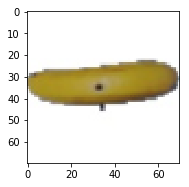

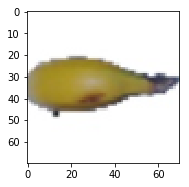

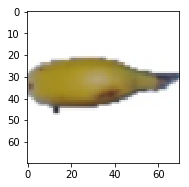

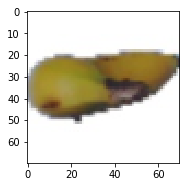

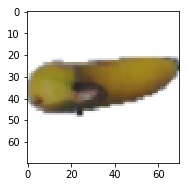

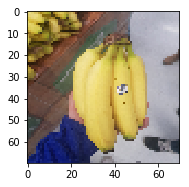

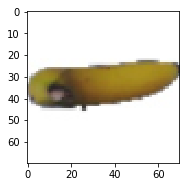

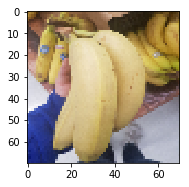

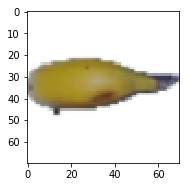

In [9]:
images = []
for fruit in FRUITS:
    for cat in CATEGORIES:
        path = os.path.join(DIRECTORY,fruit,cat)
        class_num = CATEGORIES.index(cat) #good = 0  | bad = 1
        for img in os.listdir(path):
            try:
                
                img_array = cv2.imread(os.path.join(path,img))
                b,g,r = cv2.split(img_array)
                new_array = cv2.merge([r,g,b])
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
                plt.subplot(122)
                plt.imshow(new_array)
                images.append([new_array, class_num])
                plt.imshow(new_array, cmap='gray')  # Graficar un imagen
                plt.show()  # Mostrar
                
                
            except Exception as e:
                print(str(e))
                pass

# Imágenes a matrices

In [3]:
X = []
y = []
random.shuffle(images)
for i, clase in images:
    X.append(i)
    y.append(clase)
    
salida = open("X.pickel","wb")
pickle.dump(X, salida)
salida.close()
salida = open("y.pickel","wb")
pickle.dump(y, salida)
salida.close()

# Modelo

In [4]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
X = np.array(X)
X = X/X.max() ##NO CORRER MÁS DE UNA VEZ
X = X.reshape(-1,70,70,1)

In [6]:
modelo = Sequential()



modelo.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))

In [7]:
modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
modelo.fit(X,y,batch_size=32, epochs=10, validation_split=.25) #HAY QUE CAMBIAR LAS EPOCAS

ValueError: Input arrays should have the same number of samples as target arrays. Found 6 input samples and 2 target samples.